In [2]:
import random
random.seed(42)
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

sns.set()

df = pd.read_csv("registro01.csv",)
df.columns = df.columns = ['x0','x1','x2','x3','x4','x5','x6',
              'x7','x8','x9', 'target']


#exibir valores ausentes ou null
df.isnull().sum().sort_values(ascending=False)[:10]
print("Número de linhas e colunas no conjunto de treinamento:", df.shape)
attributes = list(df.columns)
#removendo valores nulos
df.dropna()

#preencher os nulos
df.fillna(df.mean(0))

#remover duplicados
df.drop_duplicates()


Número de linhas e colunas no conjunto de treinamento: (1000, 11)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,-0.640731,0.677929,-0.285153,0.469127,1.629361,-0.407575,0.677929,0.781634,-0.132065,-0.125852,238.342700
1,-1.257229,0.199883,0.369755,0.905828,2.199284,0.407064,0.199883,-0.276165,0.136314,-0.835977,30.823609
2,-1.351330,-0.159821,-0.667650,-0.067187,1.309160,-0.702359,-0.159821,-0.133427,-0.683428,-1.016574,-135.707090
3,-2.432787,-0.996849,-0.704290,-0.750186,1.066865,-0.082292,-0.996849,-1.860141,-1.151661,-1.850721,-579.983211
4,-1.475213,-0.318454,-0.682221,-0.151922,1.148624,-0.583869,-0.318454,-0.621999,-0.619677,-1.134553,-250.729762
5,-2.036118,-1.078599,-0.499542,-0.172896,1.229001,-0.398228,-1.078599,-1.428676,-0.831903,-1.701761,-505.959443
6,-1.691544,-0.526730,-1.080969,-0.458262,0.553429,-1.145279,-0.526730,-0.684251,-1.480774,-0.981174,-331.728587
7,-0.441204,0.624858,0.518443,0.884419,2.270696,0.458040,0.624858,-0.164600,0.381948,-0.118522,171.255615
8,-2.648067,-1.897761,-1.109478,-1.327286,0.566497,-0.719584,-1.897761,-2.537705,-1.663454,-2.328546,-906.764602
9,-0.355480,0.576553,0.630524,1.034954,2.511433,0.900122,0.576553,-0.372276,0.410074,-0.076135,153.852732


In [22]:
# Importing the dataset
x = df.iloc[:, :-1].values
y = df.iloc[:, 10].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [23]:

from sklearn.linear_model import LinearRegression
result = LinearRegression()
result.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:

print(result.intercept_) 
print(result.coef_)

25.144800255629008
[ 30.86965094  46.81955766   0.16238441  66.59946801   9.89451131
  35.72178202  46.81955766 159.83399885  19.01962661  53.28395077]


In [7]:
y_pred= result.predict(X_test)


In [8]:
DF = pd.DataFrame(data=y_test, columns=['y_test'])
DF['y_predict'] = y_pred
DF

,y_test,y_predict
0,507.154596,530.604064
1,-113.222392,-110.680677
2,115.082893,102.680660
3,120.973302,97.316522
4,4.947232,28.851993
5,-141.147816,-156.428133
6,-94.370213,-60.998260
7,-638.064332,-676.988339
8,399.290255,436.094485
9,180.672498,193.357458


In [9]:
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_pred)
print(r_square)

0.9982451830893873


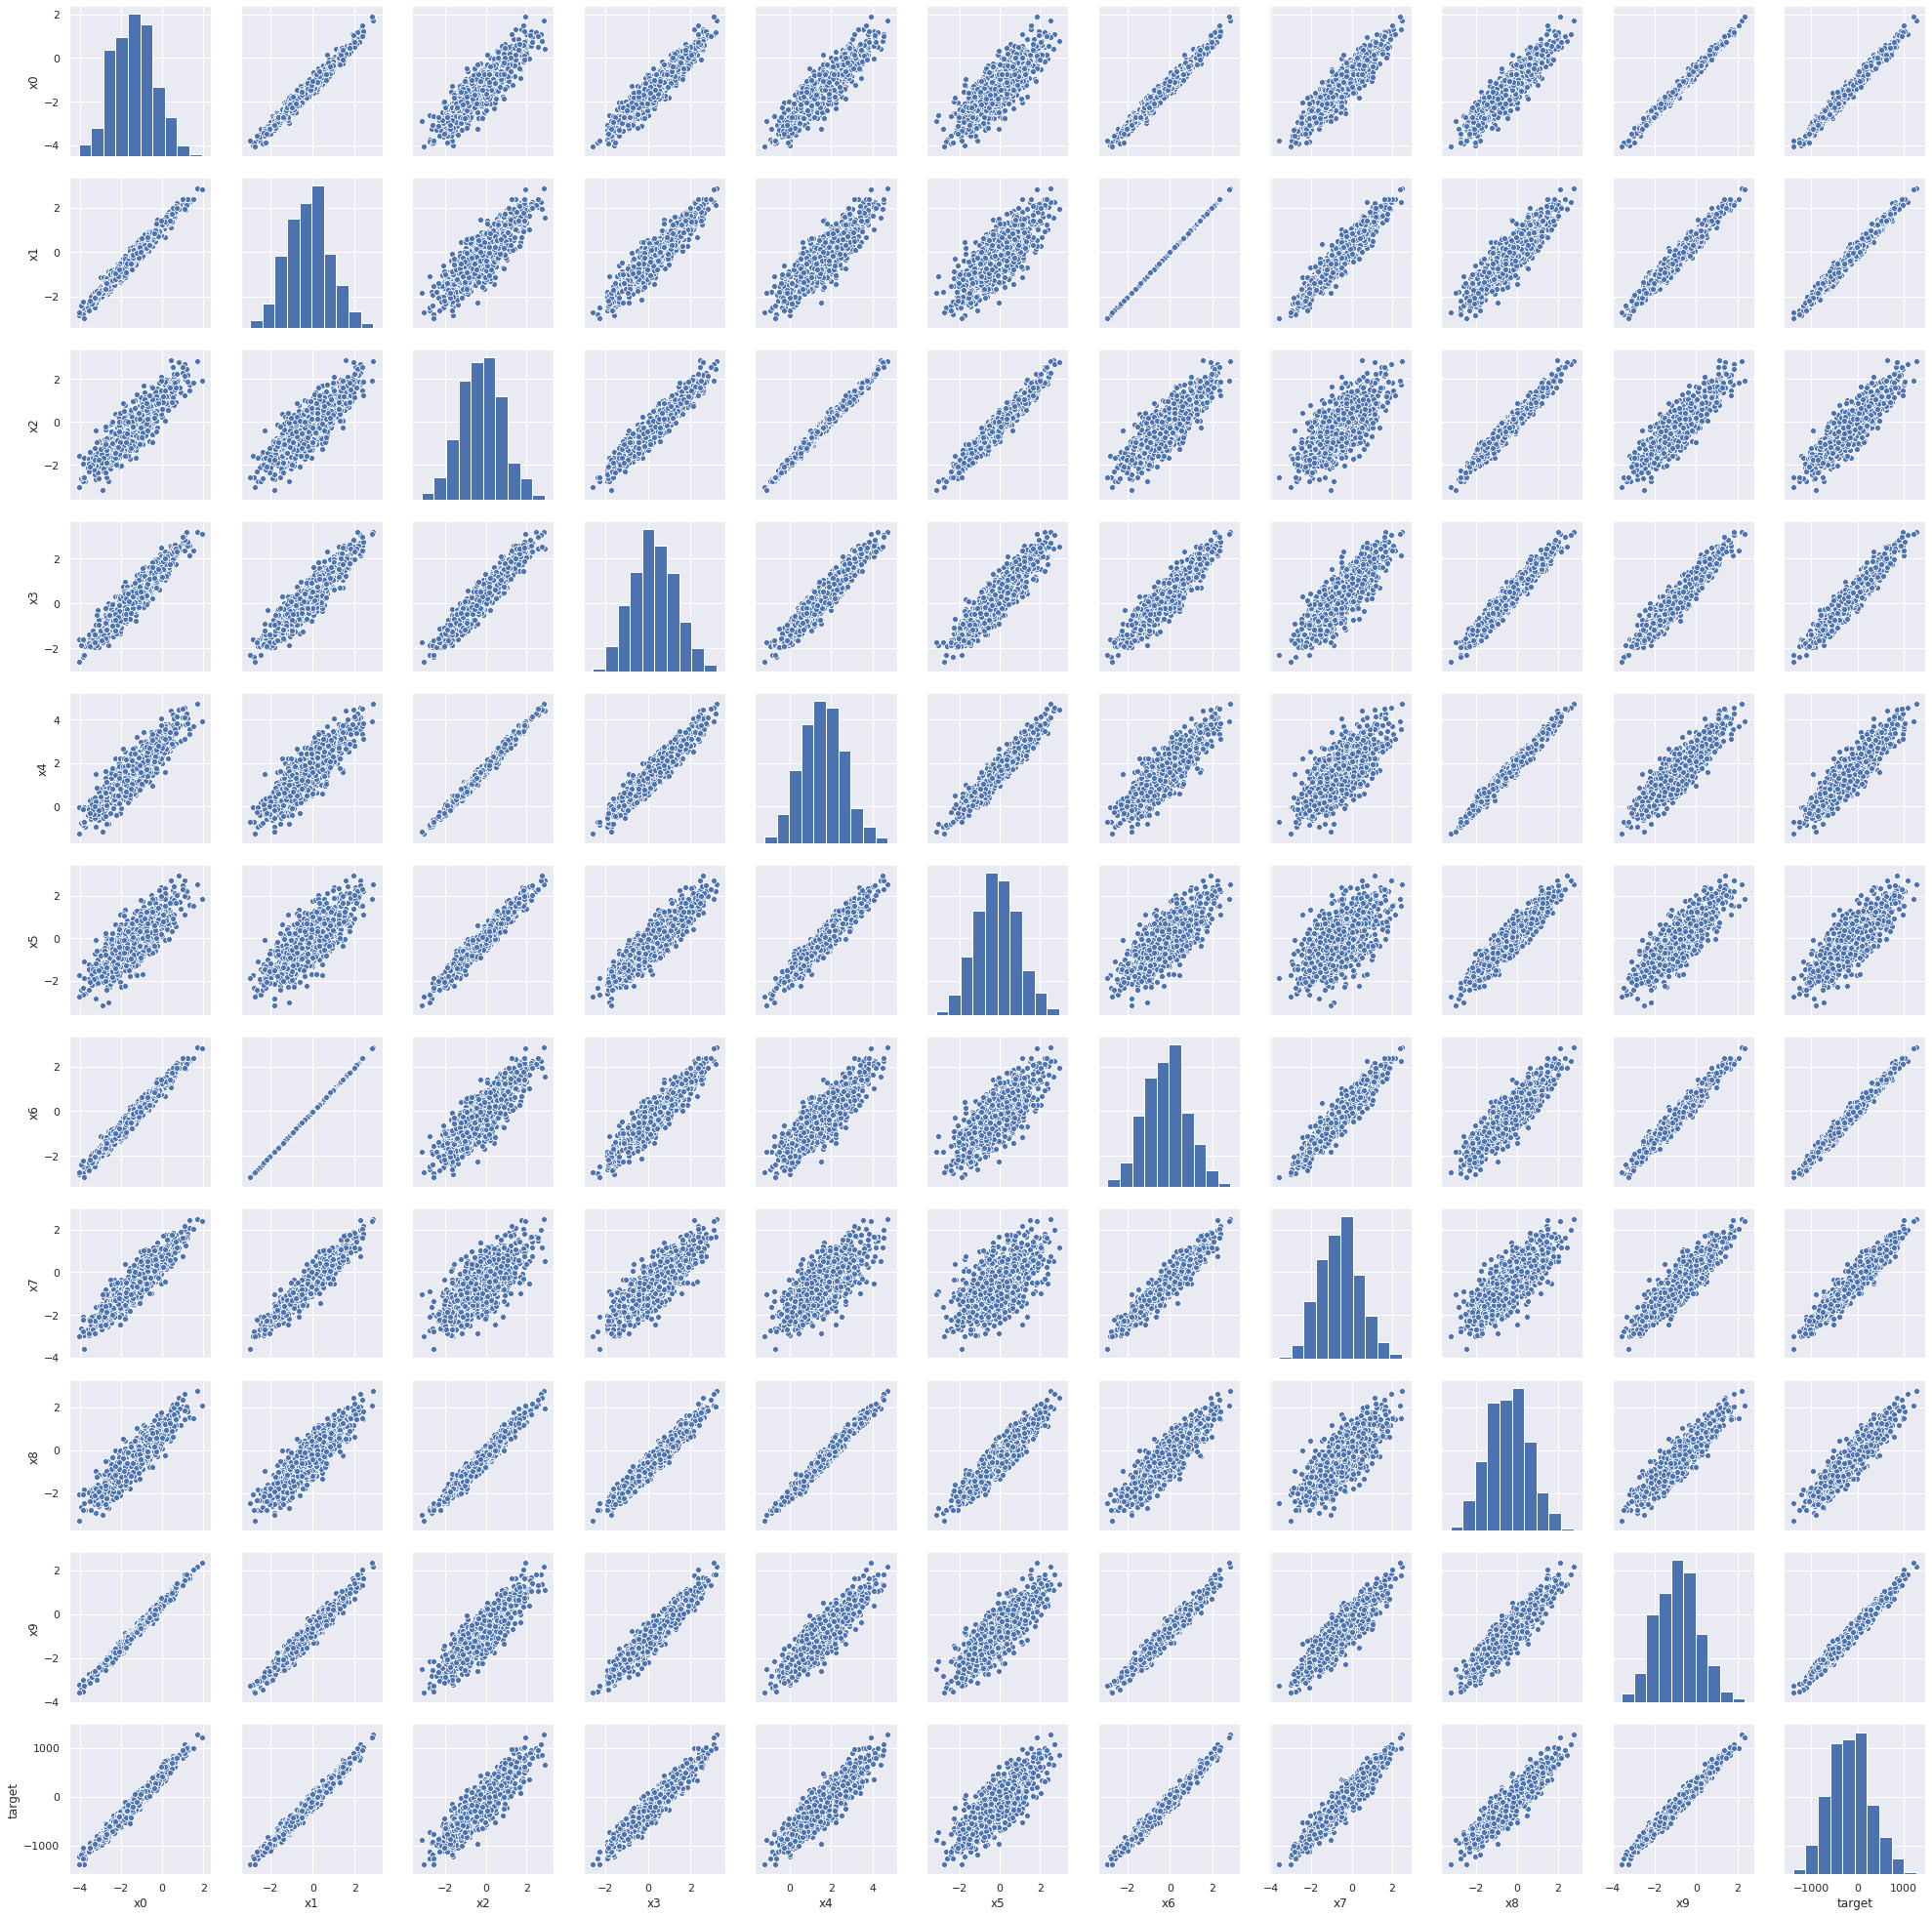

In [16]:
sns.pairplot(df)

In [10]:

v = sm.add_constant(x, prepend=True)
res = sm.OLS(y,x).fit()

print(res.params)
print(res.bse)
print(res.summary())
print("R2: " + str(res.rsquared))
print("R2 ajusted: " + str(res.rsquared_adj))

[ 29.26993453  31.3014815   45.58207457   2.43388278  66.59024054
   7.65963997  38.6093196   45.58207457 161.07518436  16.8326167
  53.68336845]
[12.61532434  5.8550185   2.00491933  5.34960272  3.17482372  5.8624514
  3.60448359  2.00491933  2.93180589  4.1809197   5.22866419]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.099e+04
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:11:34   Log-Likelihood:                -4372.7
No. Observations:                1000   AIC:                             8765.
Df Residuals:                     990   BIC:                             8814.
Df Model:                           9                                         
Covarianc

1000
200
200


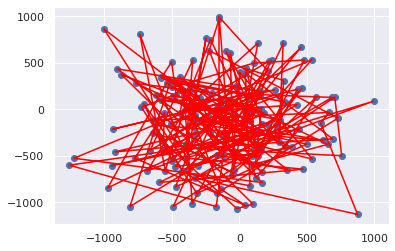

In [28]:
plt.scatter(y_test, y_pred)
print(x.size)
print(y_pred.size)
print(y_test.size)

plt.plot(y_test, y_pred, color = 'red')